<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [135]:
# Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [136]:
# Importing the dataset
# Analysis Task 1. Import a 311 NYC service request.

df_dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3> Task 1. Import a 311 NYC service request. <b>[Completed]</b> </h3>

In [137]:
# Inspecting the dataset

df_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [138]:
# Chaning the 'Created Date' column values to Datetime values

df_dataset['Created Date'] = pd.to_datetime(df_dataset['Created Date'])

In [139]:
# Changing the 'Closed Date' column values to Datetime values

df_dataset['Closed Date'] = pd.to_datetime(df_dataset['Closed Date'])


In [140]:
# Adding a new cloumn 'Request_Closing_Time'
# Analysis Task 2. Read or convert the columns 'Created Date' to datetime datatype 
# and create a new column 'Request_Closing_Time'

df_dataset['Request_Closing_Time'] = df_dataset['Closed Date'] - df_dataset['Created Date']

In [141]:
# Inspecting the dataset again for modifications 

df_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


<h3> Task 2. Read or convert the columns 'Created Date' to date time datatype <b>[Completed]</b> </br> and create a new column 'Request_Closing_Time' <b>[Completed]</b></h3>

In [142]:
# Dealing with missing data 

df_dataset.fillna(value=0, inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
# Inspecting name of various cloumns for better data wrangling

df_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [144]:
# Inspecting the 'Status' column

df_dataset['Status'].describe()

count     364558
unique         4
top       Closed
freq      362114
Name: Status, dtype: object

In [145]:
# Checking the percentage of closed application
# Finding: The department is able to close 99.32(approx.)% of the requests received.

df_dataset['Status'].describe()['freq']/df_dataset['Status'].describe()['count']

0.9932959913100248

<h5>Finding: The department is able to close 99.32%(approx.) of the requsets / complaints received.</h5>

In [146]:
# Inspecting by 'Status' group

dfg_status = df_dataset.groupby('Status')
dfg_status.size()

Status
Assigned       802
Closed      362114
Draft            2
Open          1640
dtype: int64

In [147]:
# Inspecting the 'Open' group in 'Status' cloumn
# Inspecting the complaints which are open.

df_open = dfg_status.get_group('Open')
df_open

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
416,32305700,2015-12-31 14:16:04,0,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,0.0,5426-5526 90TH ST,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
611,32309308,2015-12-31 09:58:06,0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,0.0,30 STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
1648,32303348,2015-12-30 05:13:42,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,21600-2169 91ST AVE,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
1816,32294519,2015-12-29 22:44:50,0,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,0.0,127 STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
1965,32296487,2015-12-29 19:09:13,0,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,0.0,5201-5299 68TH ST,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
2667,32288265,2015-12-28 21:40:26,0,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,0.0,104-1-104- 65TH AVENUE,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
2924,32283773,2015-12-28 15:26:43,0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,0.0,WEST 138 STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
3693,32277818,2015-12-27 16:52:57,0,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,0.0,104-1-104- 65TH AVENUE,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
3748,32278463,2015-12-27 15:41:19,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,40-23-40-2 215TH STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
3810,32280863,2015-12-27 13:57:23,0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,0.0,30 STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days


In [148]:
# Inspecting various complaint types which are open
# Finding: The most no. of open complaints are regarding 'Illegal Parking' issue.
dfg_open_comp = df_open.groupby('Complaint Type')
dfg_open_comp.size().sort_values(ascending=False) 

Complaint Type
Illegal Parking              713
Noise - Street/Sidewalk      359
Noise - Commercial           202
Blocked Driveway             172
Derelict Vehicle             118
Noise - Vehicle               32
Noise - Park                  10
Animal Abuse                   9
Vending                        6
Drinking                       5
Traffic                        3
Noise - House of Worship       2
Homeless Encampment            2
Ferry Complaint                2
Posting Advertisement          2
Bike/Roller/Skate Chronic      2
Panhandling                    1
dtype: int64

<h3> Table 01: Open Complaints </h3>
<h5> Sorted list of open complaints/ requests. </h5>

In [149]:
# Inspecting the 'Assigned' group of 'Status' column
# Inspecting the complaints which were assigned.
df_assigned = dfg_status.get_group('Assigned')
df_assigned

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
1987,32293372,2015-12-29 18:31:39,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,21345-2141 92ND AVE,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
2149,32290742,2015-12-29 14:27:24,0,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10016.0,230 EAST 30 STREET,...,0,0,0,0.0,0,0,40.742854,-73.979134,"(40.74285387870548, -73.97913408166315)",0 days
2415,32294435,2015-12-29 08:42:01,0,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,0.0,65-5-65-15 YELLOWSTONE BOULEVARD,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
2541,32289587,2015-12-29 01:01:26,0,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,0.0,3103-3183 34TH ST,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
2556,32285006,2015-12-29 00:35:56,0,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,0.0,32-69-32-7 31ST STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
5292,32272936,2015-12-25 18:34:09,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,53-64-53-6 62ND STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
5396,32273125,2015-12-25 15:08:56,0,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,0.0,95-0-95-98 84TH STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
5503,32272389,2015-12-25 11:46:16,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,2004-2084 21ST ST,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
5572,32270967,2015-12-25 09:38:53,0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,0.0,30 STREET,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days
5646,32272501,2015-12-25 04:51:05,0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,0.0,CLARENDON ROAD,...,0,0,0,0.0,0,0,0.000000,0.000000,0,0 days


In [150]:
# Finding: The most no. of complaints that were assigned were regarding 'Illegal Parking'

dfg_assigned_comp = df_assigned.groupby('Complaint Type')
dfg_assigned_comp.size().sort_values(ascending=False)

Complaint Type
Illegal Parking              267
Noise - Street/Sidewalk      201
Noise - Commercial           158
Blocked Driveway             101
Derelict Vehicle              28
Noise - Vehicle               20
Noise - Park                  11
Homeless Encampment            4
Animal Abuse                   4
Vending                        3
Traffic                        2
Posting Advertisement          1
Panhandling                    1
Bike/Roller/Skate Chronic      1
dtype: int64

<h3> Table 02: Assigned complaints / requests </h3>
<h5> Sorted list of assigned complaints/ requests </h5>

In [151]:
# Inspecting the 'Agency' group

dfg_agency = df_dataset.groupby('Agency')

In [152]:
# Finding: The dataset has request data related to agency 'NYPD' only.
dfg_agency.size()

Agency
NYPD    364558
dtype: int64

In [153]:
# Inspecting the 'Agency Name' group
# Finding: Along with New York City Polic Department and NYPD there is another agency involved, namely 'Internal Affairs Bureau'
dfg_agencyname = df_dataset.groupby('Agency Name')
dfg_agencyname.size()

Agency Name
Internal Affairs Bureau                 8
NYPD                                    2
New York City Police Department    364548
dtype: int64

In [154]:
# Dealing with inconsistency in dataset
df_dataset['Agency Name'].replace(to_replace='NYPD', value='New York City Police Department', inplace = True)

In [155]:
# Inspectin it agaain to see changes
dfg_agencyname = df_dataset.groupby('Agency Name')
dfg_agencyname.size()

Agency Name
Internal Affairs Bureau                 8
New York City Police Department    364550
dtype: int64

In [156]:
# Inspecting the 'Internal Affairs Bureau' group
# Finding: All the complaints are related to 'Language Access' 
# Finding: It takes min:(00:32:41) hrs max:(10:23:01) hrs and avg:(05:04:49)hrs to resolve such complaint.
df_IAB_comp = dfg_agencyname.get_group('Internal Affairs Bureau')
print(df_IAB_comp['Request_Closing_Time'].describe())
df_IAB_comp

count                         8
mean     0 days 05:04:49.125000
std      0 days 03:42:02.191180
min             0 days 00:31:41
25%      0 days 02:18:40.250000
50%             0 days 04:54:17
75%             0 days 07:47:02
max             0 days 10:23:01
Name: Request_Closing_Time, dtype: object


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
186023,31059332,2015-07-12 17:01:30,2015-07-13 00:33:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,07:31:30
187856,31052613,2015-07-11 06:20:57,2015-07-11 16:43:58,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,10:23:01
207251,30928156,2015-06-24 13:38:01,2015-06-24 16:20:17,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,02:42:16
239986,30709273,2015-05-27 16:39:39,2015-05-27 23:31:05,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,06:51:26
246205,30675430,2015-05-22 14:54:06,2015-05-22 16:01:59,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,01:07:53
279079,30460208,2015-04-22 09:33:01,2015-04-22 12:30:09,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,02:57:08
302893,30268955,2015-03-26 10:12:04,2015-03-26 18:45:42,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,08:33:38
322349,30073172,2015-03-02 17:06:19,2015-03-02 17:38:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,0,0.0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,00:31:41


<h5># Finding: All the complaints are related to 'Language Access'. </br>
# Finding: It takes min:(00:32:41) hrs max:(10:23:01) hrs and avg:(05:04:49)hrs to resolve such complaint.</h5>

In [157]:
# Inspecting 'Complaint Type', 'City', 'Borough' columns
df_TCB = df_dataset[['City', 'Borough', 'Complaint Type']]
df_TCB.head()

,City,Borough,Complaint Type
0,NEW YORK,MANHATTAN,Noise - Street/Sidewalk
1,ASTORIA,QUEENS,Blocked Driveway
2,BRONX,BRONX,Blocked Driveway
3,BRONX,BRONX,Illegal Parking
4,ELMHURST,QUEENS,Illegal Parking


In [158]:
# Findings: Brooklyn as a city and borough makes maximum no. of requests/complaints
# Findings: Maximum no. of complaint type is related to 'Blocked Driveway'
# Insight(Probable): Not enough/adequate parking space.
df_TCB.describe()

,City,Borough,Complaint Type
count,364558,364558,364558
unique,54,6,24
top,BROOKLYN,BROOKLYN,Blocked Driveway
freq,118862,118864,100881


<h5># Findings: <i><b>Brooklyn</b></i> as a city and borough makes maximum no. of requests/complaints<br>
    # Findings: Maximum no. of complaint type is related to <i><b>'Blocked Driveway'</b></i><br>
# Insight(Probable): Not enough/adequate parking space.</h5>

In [159]:
# Inspecting by group 'Closed'
df_closed = dfg_status.get_group('Closed')
# Limiting inspection to 'Request_Closing_Time', 'Complaint Type', 'Location Type'
df_loc_dur_type = df_closed[['Request_Closing_Time', 'Complaint Type', 'Location Type']]
df_loc_dur_type.groupby('Complaint Type').size().sort_values(ascending=False)

Complaint Type
Blocked Driveway             100607
Illegal Parking               91699
Noise - Street/Sidewalk       51131
Noise - Commercial            43749
Derelict Vehicle              21515
Noise - Vehicle               19300
Animal Abuse                  10528
Traffic                        5193
Homeless Encampment            4873
Vending                        4183
Noise - Park                   4088
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           678
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
dtype: int64

<h3> Table 03: Closed Complaints/Requests Type </h3>
<h5> Sorted list of Complaint types which are closed </h5>

In [160]:
# Inspecting multilevel by group 'Complaint Type' and 'Location Type'
# Finding: Very structured data related to resolution time, complaint type and location type.
# Need to look precisely for better findings and insights.
# Finding: Maximun no. of complaint in every category are related to Street/Sidewalk location except. Noise-House of worship.
dfg_compt = df_loc_dur_type.groupby(['Complaint Type', 'Location Type'])
dfg_compt.describe()

Request_Closing_Time  \
                                                                    count   
Complaint Type            Location Type                                     
Agency Issues             0                                             8   
Animal Abuse              0                                             1   
                          Commercial                                  108   
                          House and Store                             245   
                          Park/Playground                             143   
                          Parking Lot                                 160   
                          Residential Building                        533   
                          Residential Building/House                 6722   
                          Store/Commercial                            716   
                          Street/Sidewalk                            1874   
                          Subway Station                               26   
Animal in a Park          Park                                          1   
Bike/Roller/Skate Chronic Residential Building/House                   31   
                          Store/Commercial                             60   
                          Street/Sidewalk                             384   
Blocked Driveway          0                                            20   
                          Street/Sidewalk                          100587   
Derelict Vehicle          0                                             5   
                          Highway                                      18   
                          Roadway Tunnel                                8   
                          Street/Sidewalk                           21389   
                          Vacant Lot                                   95   
Disorderly Youth          Residential Building/House                   93   
                          Store/Commercial                             10   
                          Street/Sidewalk                             212   
Drinking                  0                                             1   
                          Club/Bar/Restaurant                         457   
                          Park/Playground                              99   
                          Residential Building/House                  296   
                          Store/Commercial                             96   
...                                                                   ...   
Noise - House of Worship  House of Worship                           1066   
Noise - Park              Park/Playground                            4088   
Noise - Street/Sidewalk   0                                             1   
                          Street/Sidewalk                           51130   
Noise - Vehicle           0                                             2   
                          Street/Sidewalk                           19298   
Panhandling               Park/Playground                               6   
                          Residential Building/House                   20   
                          Store/Commercial                             66   
                          Street/Sidewalk                             233   
Posting Advertisement     Parking Lot                                   7   
                          Residential Building/House                   69   
                          Store/Commercial                             10   
                          Street/Sidewalk                             592   
Squeegee                  Street/Sidewalk                               4   
Traffic                   0                                             2   
                          Highway                                     227   
                          Roadway Tunnel                               31   
                          Street/Sidewalk        

<h5># Finding: Maximun no. of complaint in every category are related to Street/Sidewalk location except, Noise-House of worship.</h5>

In [161]:
# Wrangling to better display tables.

df_ct_avg = df_loc_dur_type.groupby('Complaint Type').describe()

In [162]:
df_ct_avg = df_ct_avg['Request_Closing_Time']

In [163]:
# Finding: Animal in the park takes most time to resolve (14 days 00:50:34) but is also a very unlikely incident (only 1 case)
# Finding: Derelict Vehicle on the average take 07:02:37 hrs to close, second highest among all.
# Finding: As above, derelict Vehicle issue is 5th most frequent complaint made.
# Finding: Posting Advertisement request are fastest to close, averaging about 02:27:01 hrs.
df_ct_avg = df_ct_avg[['mean']].sort_values('mean', ascending=False)
df_ct_avg

,mean
Complaint Type,
Animal in a Park,14 days 00:50:34
Derelict Vehicle,0 days 07:02:37.297513
Graffiti,0 days 06:27:56.343949
Agency Issues,0 days 05:04:49.125000
Animal Abuse,0 days 05:00:33.419737
Blocked Driveway,0 days 04:30:32.131114
Panhandling,0 days 04:24:13.550769
Illegal Parking,0 days 04:20:48.481608
Homeless Encampment,0 days 04:16:56.443463


<h3> Table 04: Avg. resolution time for different complaint type </h3>
<h5> Sorted from highest to lowest </h5>

C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


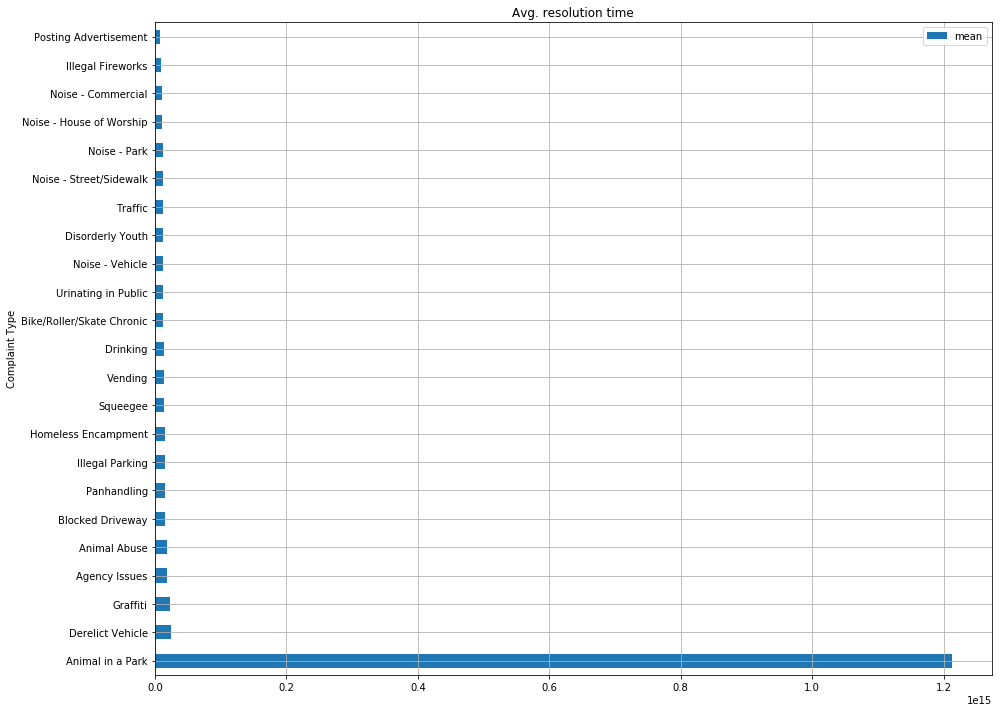

In [164]:
df_ct_avg.plot(kind='barh', title = 'Avg. resolution time', figsize=(15,12), grid=True )

In [165]:
df_ct_avg.drop('Animal in a Park', inplace=True)

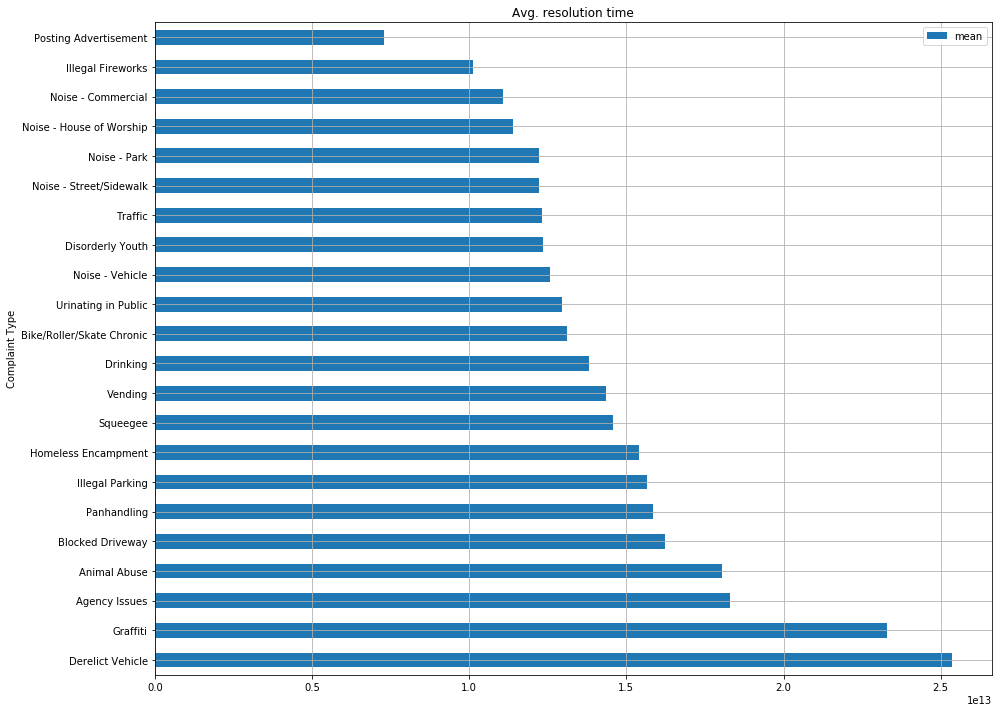

In [166]:
df_ct_avg.plot(kind='barh', title = 'Avg. resolution time', figsize=(15,12), grid=True )

<h3> Fig 01: Avg. resloution time for each complaint </h3>
<h5> Sorted graph according to Complaint type name </h5>

In [167]:
# Inspecting group 'Resolution Description'
# Finding: Max. frequency of Police Department responding and finding no evidence of violation. Cases: 107051 of Total: 364558
# Finding: No evdience pct: 29.36(approx.)%
dfg_rd = df_dataset.groupby('Resolution Description')
total = dfg_rd.size().sum()
print('Total cases:', total)
no_evd = dfg_rd.size().sort_values(ascending=False).head(1).get_values()
print('No. of cases with no evidence:', no_evd)
print('No evidence pct:', no_evd/total)
dfg_rd.size().sort_values(ascending=False)

Total cases: 364558
No. of cases with no evidence: [107051]
No evidence pct: [0.293646]


Resolution Description
The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                               107051
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                              

<h5># Finding: Max. frequency of Police Department responding and finding no evidence of violation. Cases: 107051 of Total: 364558<br>
# Finding: No evdience pct: 29.36(approx.)%</h5>

In [168]:
# Inspecting 'Request_Closing_Time'
df_closed['Request_Closing_Time'].describe()

count                    362114
mean     0 days 04:11:52.160372
std      0 days 05:51:42.319833
min             0 days 00:01:01
25%             0 days 01:15:33
50%             0 days 02:40:15
75%             0 days 05:14:35
max            24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [169]:
# Finding: Request taking minimun closing time
df_closed.loc[df_closed['Request_Closing_Time'] == df_closed['Request_Closing_Time'].min()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
61125,31882332,2015-11-01 01:41:21,2015-11-01 01:42:22,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003.0,78 EAST 4 STREET,...,0,0,0,0.0,0,0,40.726422,-73.990003,"(40.726422494913116, -73.9900025591503)",00:01:01


In [170]:
# Finding: Request taking maximum closing time
df_closed.loc[df_closed['Request_Closing_Time'] == df_closed['Request_Closing_Time'].max()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
244488,30684975,2015-05-23 23:51:59,2015-06-17 16:44:21,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238.0,0,...,0,0,0,0.0,0,0,40.68595,-73.959422,"(40.68594971751218, -73.95942153955151)",24 days 16:52:22


In [171]:
# Inspecting columns 'City' and 'Complaint Type'
display_param = ['City', 'Complaint Type']
df_display_data = df_dataset[display_param]
df_display_data

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
5,BROOKLYN,Illegal Parking
6,NEW YORK,Illegal Parking
7,BRONX,Blocked Driveway
8,KEW GARDENS,Illegal Parking
9,BROOKLYN,Blocked Driveway


In [172]:
df_display_data.describe()

,City,Complaint Type
count,364558,364558
unique,54,24
top,BROOKLYN,Blocked Driveway
freq,118862,100881


In [173]:
# Grouping by 'Complaint Type' and 'City'
dfg_Comp_type = df_display_data.groupby('Complaint Type')
dfg_City = df_display_data.groupby('City')

In [174]:
# Inspecting goroup 'City'
city_count = dfg_City.size()
city_count

City
0                        2997
ARVERNE                   259
ASTORIA                  7991
Astoria                   906
BAYSIDE                  1550
BELLEROSE                 487
BREEZY POINT               31
BRONX                   49171
BROOKLYN               118862
CAMBRIA HEIGHTS           617
CENTRAL PARK              110
COLLEGE POINT            1544
CORONA                   5383
EAST ELMHURST            3558
ELMHURST                 3438
East Elmhurst              30
FAR ROCKAWAY             1397
FLORAL PARK               196
FLUSHING                 7487
FOREST HILLS             2122
FRESH MEADOWS            2453
GLEN OAKS                 361
HOLLIS                   1231
HOWARD BEACH             1144
Howard Beach                1
JACKSON HEIGHTS          2106
JAMAICA                  8932
KEW GARDENS              1008
LITTLE NECK               712
LONG ISLAND CITY         3028
Long Island City          170
MASPETH                  3118
MIDDLE VILLAGE           2291
NEW H

In [175]:
# Finding: Top three request/complaint making cities: Brooklyn, New York, Bronx in descending order.
# Finding: Bottom three request/complaint making cities: Howard Beach, East Elmhurst, Breezy Point
comp_city = city_count.sort_values(ascending=False)
comp_city

City
BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
0                        2997
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSED

<h3> Table 05: Cities with most complaints </h3>
<h5> Top: Brooklyn <br> Bot: Howard Beach</h5>

In [176]:
comp_count = dfg_Comp_type.size()
comp_count

Complaint Type
Agency Issues                     8
Animal Abuse                  10541
Animal in a Park                  1
Bike/Roller/Skate Chronic       478
Blocked Driveway             100881
Derelict Vehicle              21661
Disorderly Youth                315
Drinking                       1409
Ferry Complaint                   2
Graffiti                        157
Homeless Encampment            4879
Illegal Fireworks               172
Illegal Parking               92679
Noise - Commercial            44109
Noise - House of Worship       1070
Noise - Park                   4109
Noise - Street/Sidewalk       51692
Noise - Vehicle               19352
Panhandling                     327
Posting Advertisement           681
Squeegee                          4
Traffic                        5198
Urinating in Public             641
Vending                        4192
dtype: int64

In [177]:
value_sorted = comp_count.sort_values(ascending=False)
major_complaints = value_sorted[:10]
major_complaints

Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
dtype: int64

<h3> Table 06: Major Complaint Types </h3>

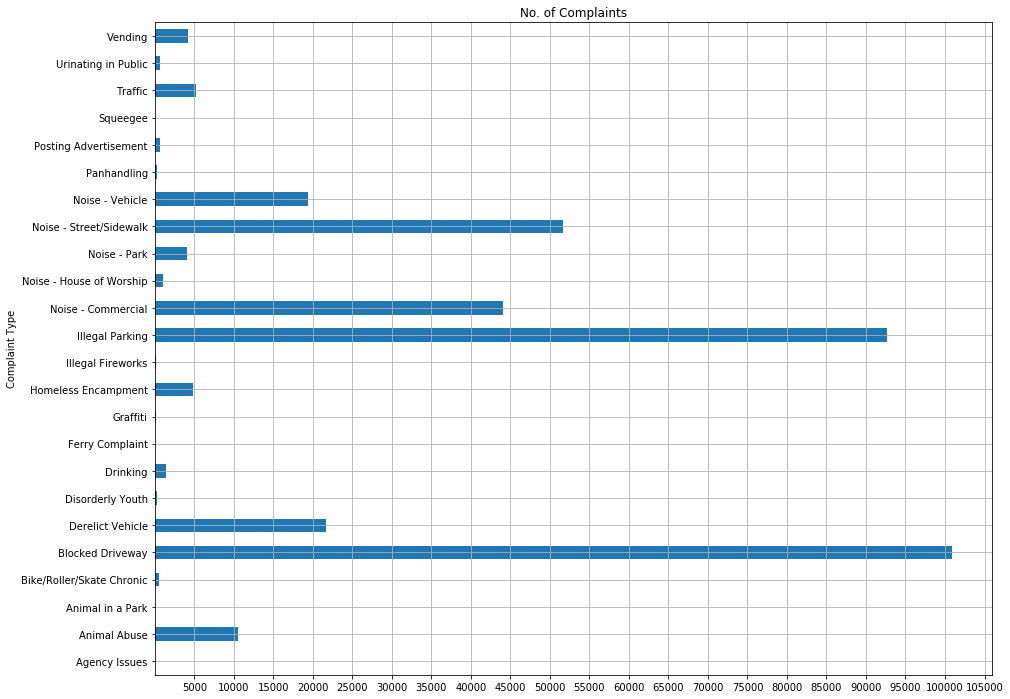

In [178]:
# Grapnical representation of complaints and their count

comp_count.plot(kind='barh', title = 'No. of Complaints', figsize=(15,12), grid=True, xticks=[x*5000 for x in range(1,22)] )

<h3> Fig 02: No. of complaints by type </h3>

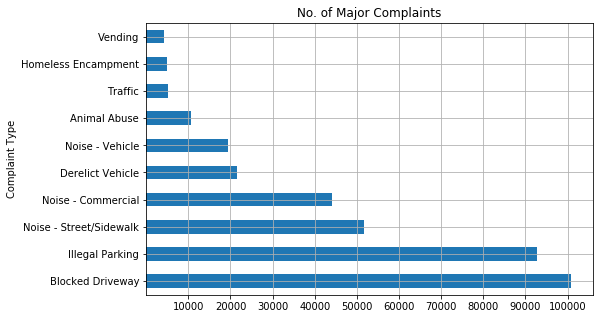

In [179]:
# Graphical representation of major complaints

major_complaints.plot(kind='barh', title='No. of Major Complaints', figsize=(8,5), grid=True, xticks=[x*10000 for x in range(1,11)])

<h3> Fig 03: No. of major complaints Top 10 </h3>
<h5> Sorted list by major complaints </h5>

In [180]:
# Data wrangling to show 'City' vs 'Complaint Type' heat map

df_matrix = pd.DataFrame(index=df_display_data['City'].unique(), columns=df_display_data['Complaint Type'].unique())
df_matrix.fillna(value=0)
for city, df1 in dfg_City:
    group = df1.groupby('Complaint Type')
    for ctype, df2 in group:
        df_matrix[ctype][city] = df2.shape[0]
df_matrix.fillna(value=0, inplace=True)
df_matrix

,Noise - Street/Sidewalk,Blocked Driveway,Illegal Parking,Derelict Vehicle,Noise - Commercial,Noise - House of Worship,Posting Advertisement,Noise - Vehicle,Animal Abuse,Vending,...,Noise - Park,Homeless Encampment,Urinating in Public,Graffiti,Disorderly Youth,Illegal Fireworks,Ferry Complaint,Agency Issues,Squeegee,Animal in a Park
NEW YORK,22252,2707,14553,695,18692,222,49,6295,1941,2639,...,1244,3060,264,25,81,38,0,0,4,0
ASTORIA,409,3436,1340,426,1653,21,3,236,170,57,...,64,32,10,4,5,4,0,0,0,0
BRONX,9146,17063,9889,2403,2945,90,18,3556,1971,433,...,548,275,54,15,66,24,0,0,0,0
ELMHURST,228,1992,760,94,85,6,1,69,59,25,...,35,34,10,1,2,1,0,0,0,0
BROOKLYN,13984,36447,33533,6259,13860,389,58,5966,3191,575,...,1575,948,155,60,79,61,0,0,0,0
KEW GARDENS,13,429,276,16,203,1,1,23,26,1,...,0,5,3,0,0,0,0,0,0,0
JACKSON HEIGHTS,238,703,241,41,619,2,1,75,50,86,...,8,11,3,1,0,1,0,0,0,0
MIDDLE VILLAGE,38,663,1104,366,13,0,0,45,36,0,...,4,5,0,0,0,0,0,0,0,0
REGO PARK,64,780,640,94,82,1,0,60,33,3,...,22,6,1,1,0,0,0,0,0,0
SAINT ALBANS,81,318,237,248,36,1,0,50,43,2,...,1,11,1,0,1,0,0,0,0,0


<h3> Table 07: Complaint Type vs City </h3>
<h5> Sorted table showing various complaints/ requests type by cities in decreasing order </h5>

In [181]:
# Shows correlation among various complaints/requests made.
# Finding: The correlation seems very logical.
# eg. Noise - Street/Sidewalk - high positive correlation with 
# Noise - Commercial, Noise - Vehicle, Animal Abuse, Vending, Traffic, Drinking, Bike/Roller/Skate Chronic, 
# Noise - Park, Disrderly youth, Illegal Fireworks, etc.  which is quite logical
# eg. Noise - Street/Sidewalk - low and/or negitave correlation with
# Posting Advertisement, Ferry Complaints, Derelict Vehicle, Agency issue, etc. which is also very logical
df_matrix.corr()

,Noise - Street/Sidewalk,Blocked Driveway,Illegal Parking,Derelict Vehicle,Noise - Commercial,Noise - House of Worship,Posting Advertisement,Noise - Vehicle,Animal Abuse,Vending,...,Noise - Park,Homeless Encampment,Urinating in Public,Graffiti,Disorderly Youth,Illegal Fireworks,Ferry Complaint,Agency Issues,Squeegee,Animal in a Park
Noise - Street/Sidewalk,1.000000,0.606723,0.814728,0.591476,0.971729,0.781445,0.135552,0.979558,0.879818,0.925231,...,0.939849,0.934558,0.977869,0.800782,0.945680,0.891108,-0.011951,-0.011951,0.797135,-0.035609
Blocked Driveway,0.606723,1.000000,0.919526,0.952026,0.605332,0.774740,0.140101,0.751411,0.889963,0.273725,...,0.809411,0.321651,0.547704,0.921150,0.767737,0.869998,-0.039582,-0.039582,0.021628,-0.048091
Illegal Parking,0.814728,0.919526,1.000000,0.928029,0.840974,0.876964,0.260806,0.904367,0.962559,0.563685,...,0.953902,0.620695,0.790741,0.989382,0.890613,0.979181,-0.012368,-0.012368,0.353374,-0.046971
Derelict Vehicle,0.591476,0.952026,0.928029,1.000000,0.605606,0.760546,0.377021,0.730289,0.889074,0.274823,...,0.789897,0.335723,0.557893,0.904439,0.768341,0.876238,-0.029868,-0.029868,0.043858,-0.059567
Noise - Commercial,0.971729,0.605332,0.840974,0.605606,1.000000,0.814471,0.139531,0.954384,0.849661,0.907280,...,0.951505,0.938982,0.985145,0.838016,0.892128,0.898902,-0.017488,-0.017488,0.791714,-0.035913
Noise - House of Worship,0.781445,0.774740,0.876964,0.760546,0.814471,1.000000,0.124557,0.841900,0.846123,0.590912,...,0.885553,0.642528,0.769673,0.877141,0.800919,0.875743,-0.037036,-0.037036,0.420336,-0.039115
Posting Advertisement,0.135552,0.140101,0.260806,0.377021,0.139531,0.124557,1.000000,0.150439,0.282373,0.095215,...,0.141004,0.116815,0.161049,0.185435,0.287494,0.248557,-0.022771,-0.022771,0.071362,-0.024732
Noise - Vehicle,0.979558,0.751411,0.904367,0.730289,0.954384,0.841900,0.150439,1.000000,0.952763,0.832895,...,0.980413,0.852844,0.945356,0.892176,0.976434,0.956310,-0.033576,-0.033576,0.663613,-0.039836
Animal Abuse,0.879818,0.889963,0.962559,0.889074,0.849661,0.846123,0.282373,0.952763,1.000000,0.644928,...,0.953245,0.674456,0.829866,0.942465,0.970747,0.979940,-0.045251,-0.045251,0.431210,-0.047968
Vending,0.925231,0.273725,0.563685,0.274823,0.907280,0.590912,0.095215,0.832895,0.644928,1.000000,...,0.765232,0.992305,0.942072,0.554566,0.778105,0.675794,-0.026609,-0.026609,0.964965,-0.029246


<h3> Table 08: Complaint types correlation. </h3>
<h5> # Finding: The correlation seems very logical.<br>
# eg. Noise - Street/Sidewalk - high positive correlation with <br> 
# Noise - Commercial, Noise - Vehicle, Animal Abuse, Vending, Traffic, Drinking, Bike/Roller/Skate Chronic, <br>
# Noise - Park, Disrderly youth, Illegal Fireworks, etc.  which is quite logical <br>
# eg. Noise - Street/Sidewalk - low and/or negitave correlation with <br>
# Posting Advertisement, Ferry Complaints, Derelict Vehicle, Agency issue, etc. which is also very logical</h5>

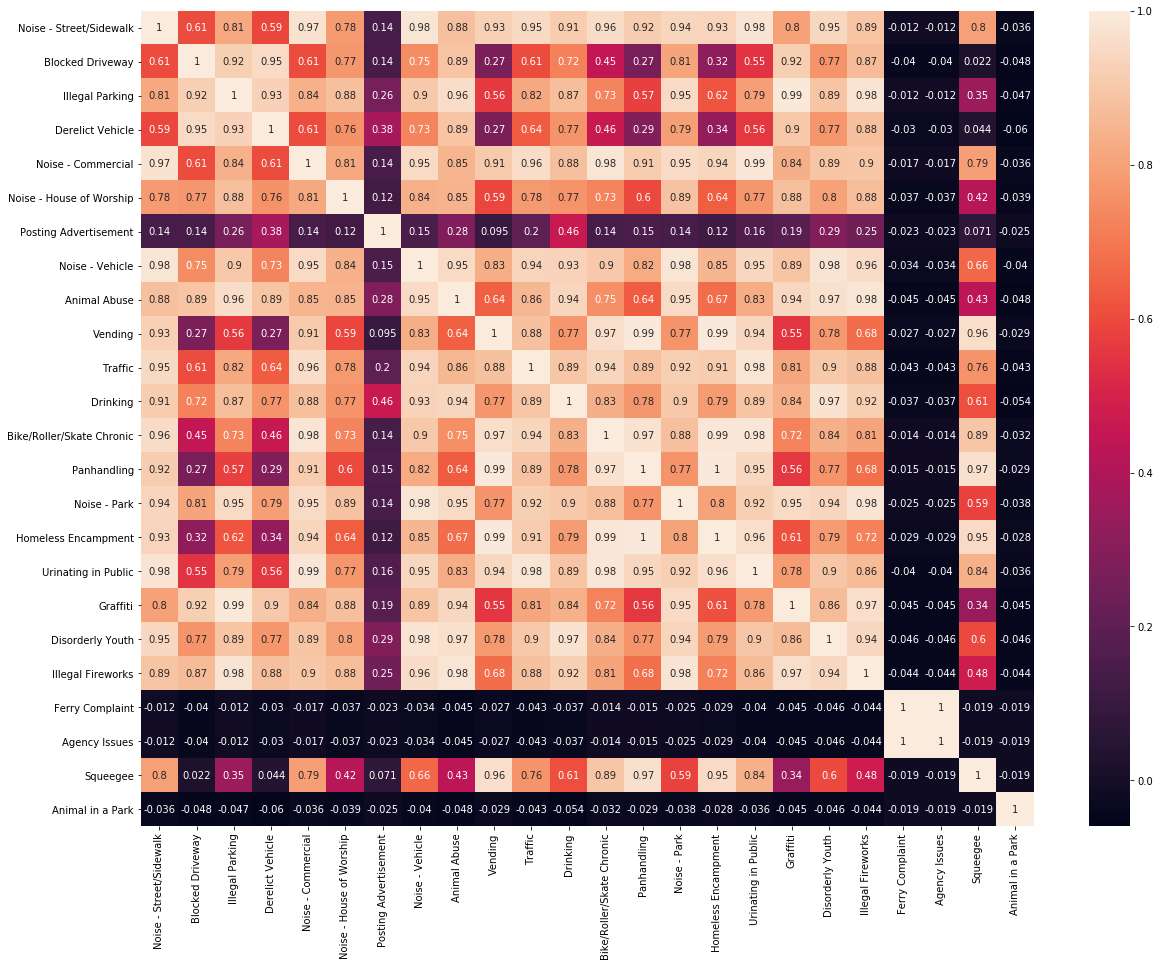

In [182]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_matrix.corr(), ax=ax, robust=False, annot=True, linewidths=0)

<h3> Fig 04: Heatmap of Complaint type correaltion </h3>

In [183]:
# Shows correlation with requests/complaints among various cities.
# Limited practical use. But, fun to do. 
# Finding: Complaints in New York are high positively correlated to complaints in Queens, Astoria
# Finding: Complaints in Astoria are high positively correlated to complaints in Kew Gardens

df_matrix.transpose().corr()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
NEW YORK,1.000000,0.409379,0.539819,0.214070,0.578856,0.413076,0.608320,0.327958,0.323962,0.316842,...,0.235626,0.150462,0.674597,0.527278,0.860350,0.828579,0.606554,0.411425,0.384241,-0.017713
ASTORIA,0.409379,1.000000,0.879780,0.919533,0.902289,0.972604,0.940046,0.678909,0.883057,0.790853,...,0.484385,0.917857,0.033738,0.503739,0.564888,0.737962,0.830941,0.460776,0.275706,0.843508
BRONX,0.539819,0.879780,1.000000,0.916548,0.949529,0.865306,0.798999,0.754347,0.903594,0.848040,...,0.545894,0.878459,0.380198,0.564321,0.673121,0.678130,0.913921,0.575203,0.400146,0.763401
ELMHURST,0.214070,0.919533,0.916548,1.000000,0.881645,0.910298,0.760304,0.736561,0.939538,0.816433,...,0.490615,0.984033,0.057394,0.452462,0.436968,0.523025,0.831533,0.506432,0.308297,0.928926
BROOKLYN,0.578856,0.902289,0.949529,0.881645,1.000000,0.939907,0.822091,0.875698,0.956449,0.863328,...,0.659660,0.873637,0.219552,0.764588,0.794030,0.816075,0.979609,0.752481,0.605536,0.664735
KEW GARDENS,0.413076,0.972604,0.865306,0.910298,0.939907,1.000000,0.888939,0.785404,0.939042,0.784569,...,0.539503,0.914099,-0.035749,0.653462,0.640826,0.780711,0.893767,0.629365,0.464554,0.774017
JACKSON HEIGHTS,0.608320,0.940046,0.798999,0.760304,0.822091,0.888939,1.000000,0.498291,0.717596,0.630986,...,0.320895,0.734766,0.177354,0.430419,0.619324,0.834384,0.755895,0.332549,0.168693,0.691949
MIDDLE VILLAGE,0.327958,0.678909,0.754347,0.736561,0.875698,0.785404,0.498291,1.000000,0.913618,0.869782,...,0.867784,0.787674,-0.007676,0.893704,0.709676,0.626761,0.886084,0.921820,0.836089,0.461395
REGO PARK,0.323962,0.883057,0.903594,0.939538,0.956449,0.939042,0.717596,0.913618,1.000000,0.870138,...,0.673091,0.948599,0.016747,0.723773,0.631574,0.655778,0.933353,0.763072,0.607444,0.755830
SAINT ALBANS,0.316842,0.790853,0.848040,0.816433,0.863328,0.784569,0.630986,0.869782,0.870138,1.000000,...,0.874957,0.872139,0.110540,0.651744,0.600185,0.555177,0.805118,0.627947,0.493320,0.650467


<h3> Table 08: Correlation table for complaints by various cities. </h3>
<h5># Finding: Complaints in New York are high positively correlated to complaints in Queens, Astoria <br>
# Finding: Complaints in Astoria are high positively correlated to complaints in Kew Gardens</h5>

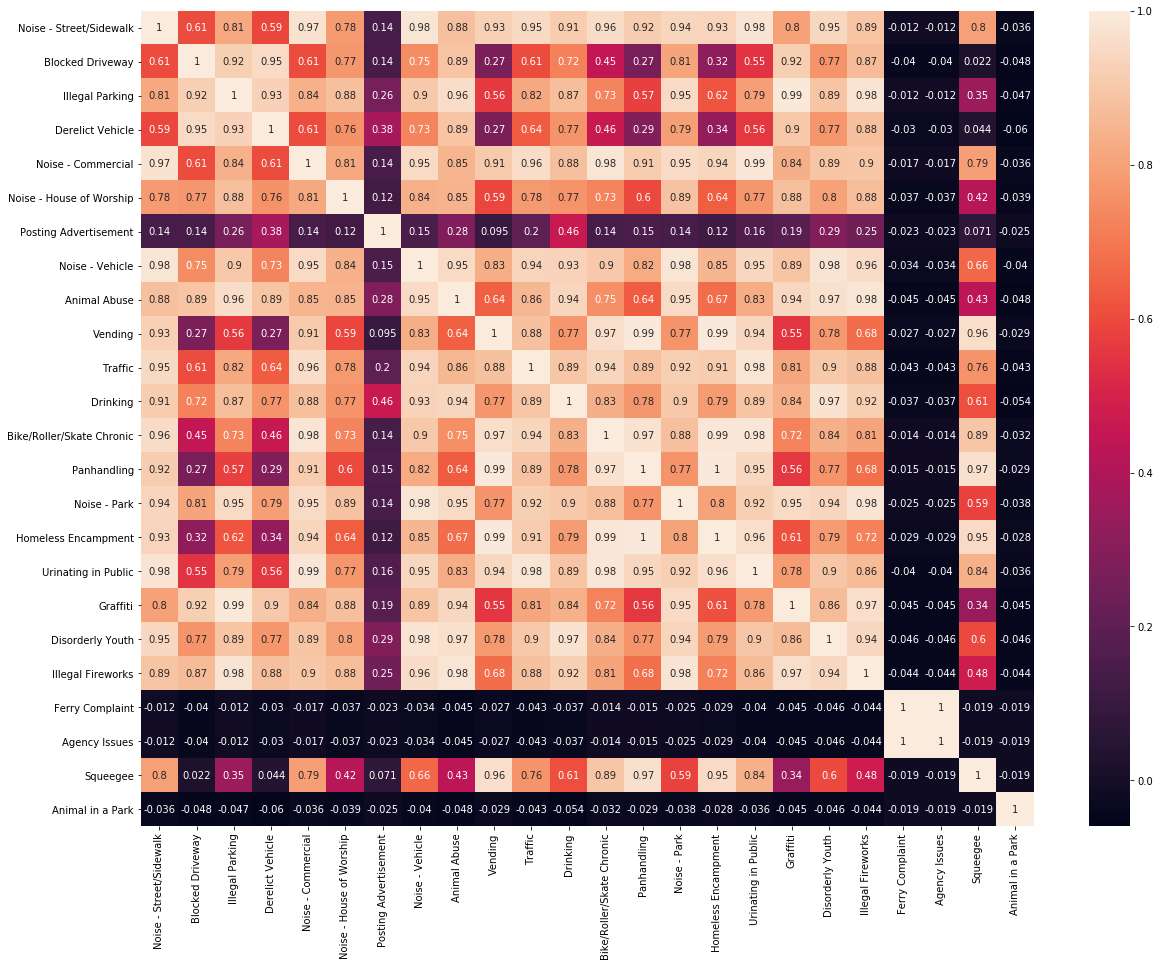

In [184]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_matrix.corr(), ax=ax, robust=False, annot=True, linewidths=0)

<h3> Fig 05: Heatmap correlating complaint types of various cities </h3>

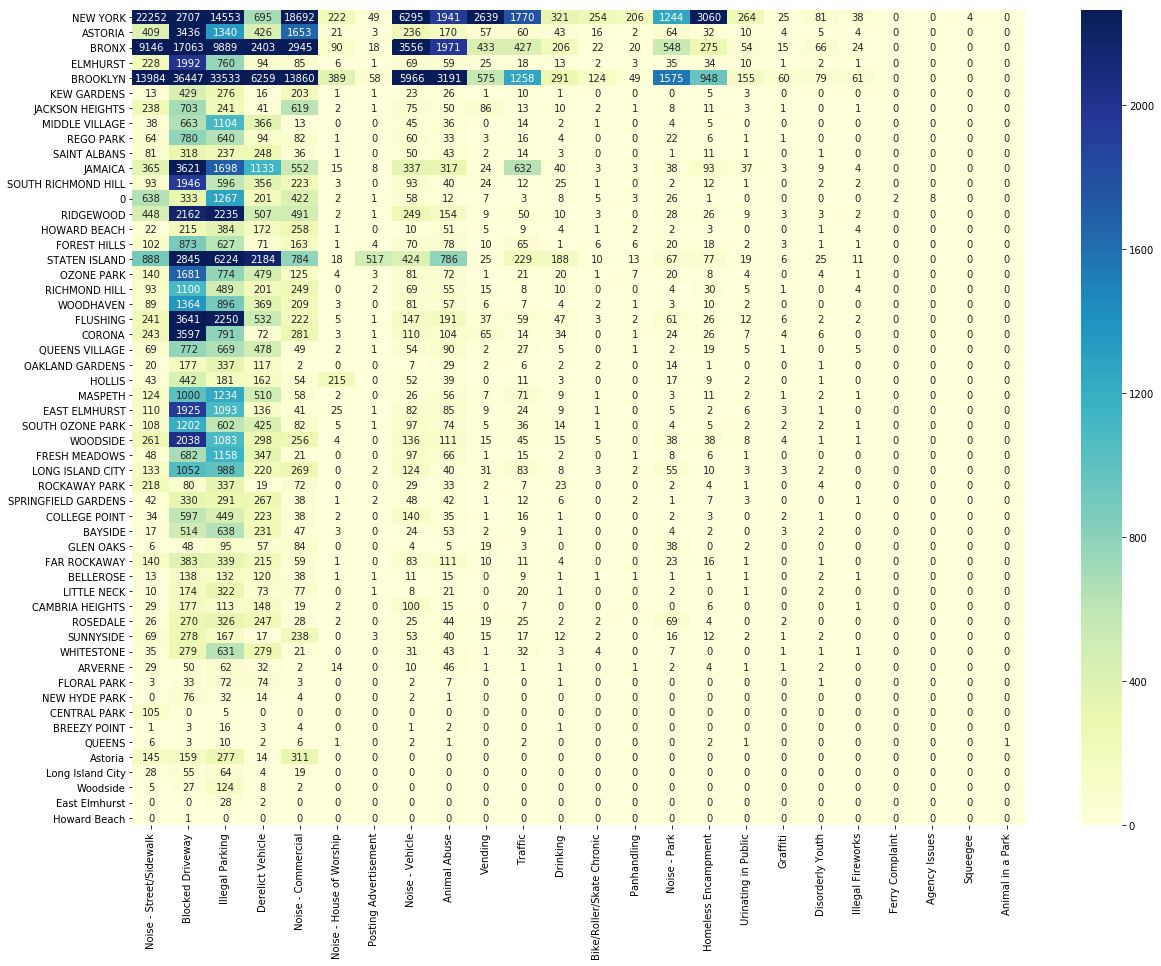

In [185]:
# Representing 'City' vs 'Complaint Type' heatmap

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_matrix, ax=ax, robust=True,cmap='YlGnBu', annot=True, fmt='d', linewidths=0)

<h3> Fig 06: Heatmap of Complaint type and Cities </h3>